## 🐍 Intro Python Workshop - AI Club Fall 2025

In this workshop, we will
- Provide a brief overview of Google Colab (built ontop of Jupyter Notebooks) and how it works ([A colab guide here](https://colab.research.google.com/notebooks/basic_features_overview.ipynb))
- Explain some basic but fundamental python tools / libraries (numpy/pandas/plotting)
- Walk through a basic machine learning example (**linear regression**) with an online dataset (**fuel consumption**) , explaining it's implementation from scratch as well as show how the same task can be accomplished through the scikit-learn library **using LinearRegression and SGDRegressor classes**

### Overview of necessary libraries

In [33]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualization
import seaborn as sns

# sklearn imports
from sklearn.linear_model import SGDRegressor, LinearRegression

A quick overview of each library and its use case:
- **pandas**: Used for data manipulation and analysis, uses DataFrame (tables) and Series objects (columns), common for data preprocessing when working with tabular data
- **numpy**: used for scientific computing & mathematical operations, performing operations on arrays and matrices (creation, manipulation) efficiently and concisely
- **matplotlib / seaborn**: both plotting libraries with matplotlib being more low-level and basic and seaborn being built on matplotlib, allowing for more visually appealing plots
- **sklearn**: user-friendly and great library used for doing machine learning / statistics / data science tasks in Python


**Links to Documentation** in case you wanted to explore more:
- [Getting Started with Pandas](https://pandas.pydata.org/docs/getting_started/index.html)
- [Numpy](https://numpy.org/doc/2.3/)
- [matplotlib](https://matplotlib.org/stable/index.html), [Seaborn](https://seaborn.pydata.org/)
- [scikit-learn](https://scikit-learn.org/stable/)


### Load in dataset
- For the purpose of this workshop, we will be using the 'Auto_MPG' dataset which contains data for different vehicles (e.g. cylinders, horsepower, weight) and was used to predict fuel consumption / efficiency (mpg). We will specifically be modeling the 'mostly' linear relationship between **vehicle weight (lbs) and its fuel efficiency (miles per gallon)**
- We've loaded this dataset from the Seaborn library. It can also be accessed here on Kaggle: https://www.kaggle.com/datasets/uciml/autompg-dataset

In [34]:
auto_mpg = sns.load_dataset("mpg")

### Exploring Dataset and Preprocessing Data for Model

In [35]:
auto_mpg.head() # print first 5 data entries

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [36]:
print(auto_mpg.shape) # prints the size of the dataframe (num-rows x num-columns)

(398, 9)


In [37]:
# pull a subset of columns (just the numerical ones)
auto_mpg_num = auto_mpg.drop(columns=['origin', 'name'])

In [38]:
auto_mpg_num.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


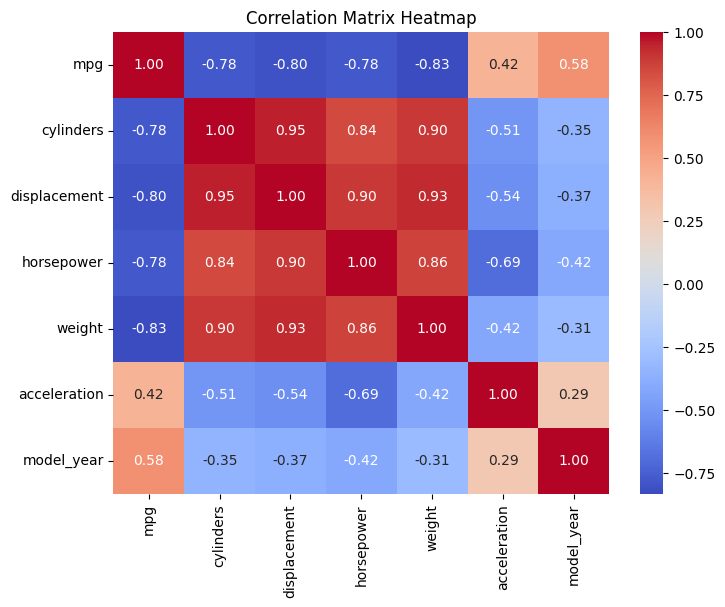

In [39]:
# print a correlation matrix with this dataframe
corr_matrix = auto_mpg_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Just looking at the leftmost column (mpg) representing correlation with our label, we can see 'weight' has the strongest correlation (-0.83) which is what we are trying to model.

In [40]:
# check for missing values, specifically in weight or mpg columns
auto_mpg_num.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0


Looks like there is only missing values in the 'horsepower' column which we can ignore for now since we are only using the 'weight' and 'mpg' columns

In [41]:
# retrieve vehicle weight and mpg data and store in individual objects
vehicle_weights = auto_mpg_num['weight']
mpg_data = auto_mpg_num['mpg']

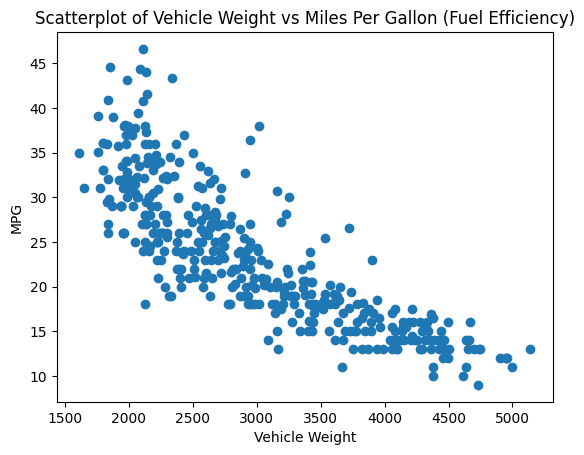

In [42]:
# visualize weight vs mpg for regression
plt.figure() # creates a figure or 'canvas' for our plots
ax = plt.subplot() # adds axes to our figure, creates a single 'subplot'

ax.scatter(vehicle_weights, mpg_data)
ax.set_xlabel('Vehicle Weight')
ax.set_ylabel('MPG')
ax.set_title('Scatterplot of Vehicle Weight vs Miles Per Gallon (Fuel Efficiency)')

plt.show()

*Notice: The scale of the vehicle weights are in the 1000s while our mpg is a lot more reasonable in scale. This can certainly influence / impact model predictions.*

One common preprocessing step used before modeling to solve this issue is **normalization** which involves calculating the mean of a set of values (in this case our vehicle weight data), subtracting it from each data value, and then dividing by the standard deviation.

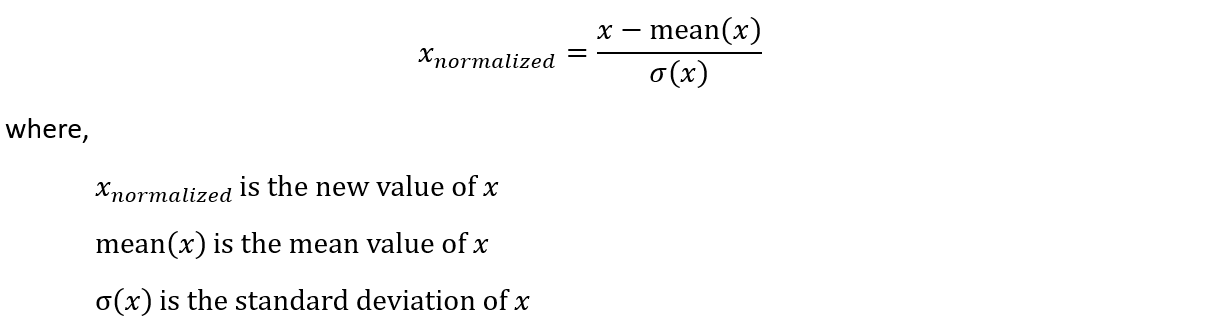

In [43]:
# normalize our vehicle weight values 'X'
v_weights_mean = vehicle_weights.mean()
v_weights_std = vehicle_weights.std()
v_weights_norm = (vehicle_weights - v_weights_mean) / v_weights_std

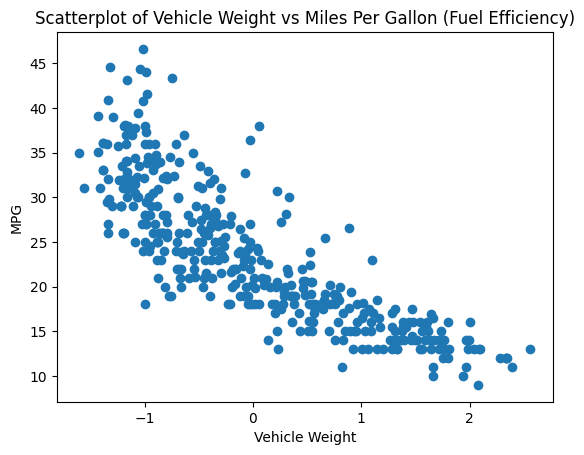

In [44]:
# plot again to show normalization
plt.figure()
ax = plt.subplot()

ax.scatter(v_weights_norm, mpg_data)
ax.set_xlabel('Vehicle Weight')
ax.set_ylabel('MPG')
ax.set_title('Scatterplot of Vehicle Weight vs Miles Per Gallon (Fuel Efficiency)')
plt.show()

### Implementing Linear Regression from Scratch with Visualizations

Mean-Squared Error Function given slope (m), bias (b), true y value (y<sub>i</sub>), and number of data values (n)

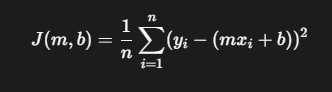

In [45]:
# define the loss / cost function to be Mean Squared Error
def mse(y_pred, y_true, n):
  # Calculate the squared difference for each data point
  squared_diff = (y_true - y_pred)**2

  # Sum the squared differences and divide by n (same as mean)
  return np.mean(squared_diff)

In [46]:
# make a predictions with starting weight and bias terms (model parameters), essentially 'guesses'
w = 0.5
b = 0.0
n = vehicle_weights.shape[0] # should be 398
print("n = ", n)

mpg_pred = w*v_weights_norm + b # get predictions (returns an array of size N)

err = mse(mpg_pred, mpg_data, n)

print("err =", err) # this should be very high

n =  398
err = 620.6051683725717


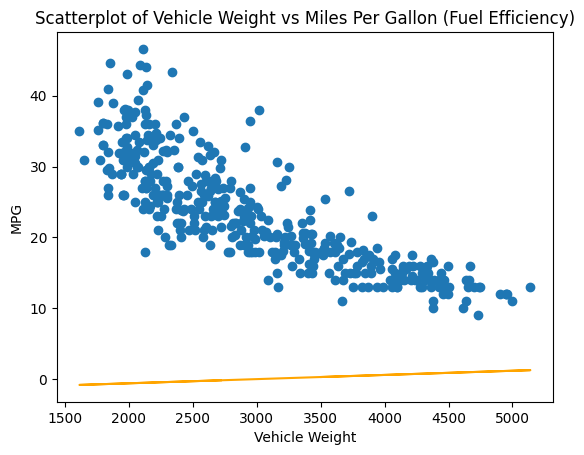

In [47]:
# visualize current line
plt.figure()
ax = plt.subplot()

ax.scatter(vehicle_weights, mpg_data)
ax.plot(vehicle_weights, mpg_pred, color='orange')
ax.set_xlabel('Vehicle Weight')
ax.set_ylabel('MPG')
ax.set_title('Scatterplot of Vehicle Weight vs Miles Per Gallon (Fuel Efficiency)')

plt.show()

### Training Loop with Gradient Descent Optimization




**A quick overview**: Gradient descent is an iterative optimization algorithm (uses calculus) to minimize a cost function (in our case MSE). It does this through repeatedly updating the model parameters so that the error function's direction can reach its steepest descent, which can be calculated using the gradient or 'slope' of the function.

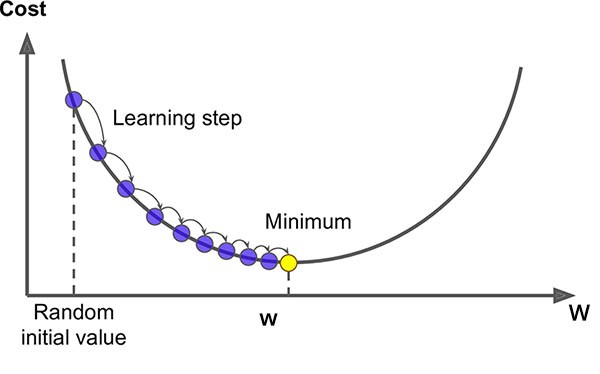

Steps:
1. Initialize set of parameters, often done randomly and define learning rate, number of iterations

2. Calculate the gradient of the cost function with respect to each parameter (direction of the steepest increase in cost)

3. Update parameters by moving a small step in the opposite direction of the gradient. Done through subtracting a scaled version of the gradient from the current parameter, the scaling factor is the 'learning rate'
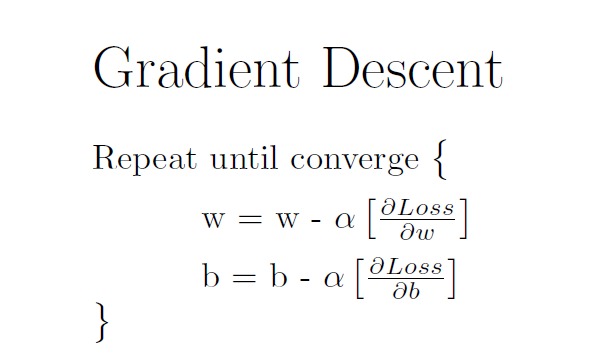

4. Repeat steps 2 and 3 for the specified number of iterations

Iteration: 1, MSE=620.6051683725717, m=0.36033432099077645, b=0.4702914572864322
Iteration: 50, MSE=101.9195530650427, m=-3.944823266887517, b=14.951278386936401
Iteration: 100, MSE=29.811371448881783, m=-5.567648361808706, b=20.39608065400046
Iteration: 150, MSE=20.244407306682607, m=-6.1601491499334315, b=22.378912553734775
Iteration: 200, MSE=18.975106349928794, m=-6.376473869724301, b=23.10099981232756

Learned Parameters: m=-6.376473869724301, b=23.10099981232756


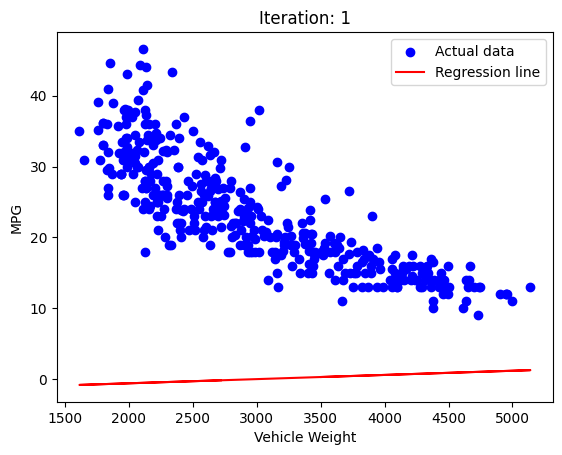

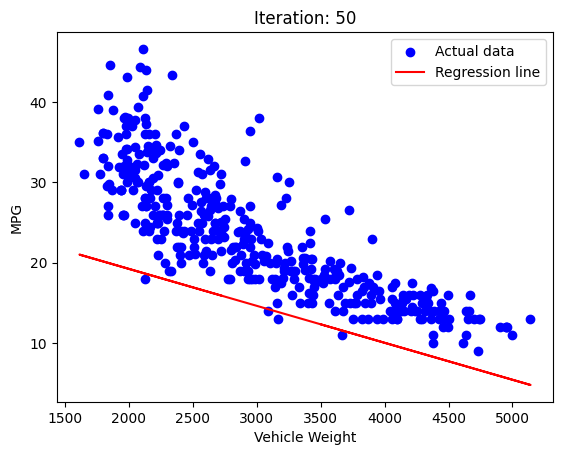

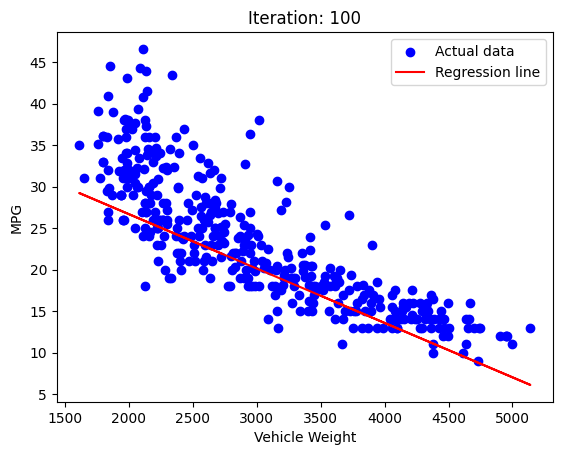

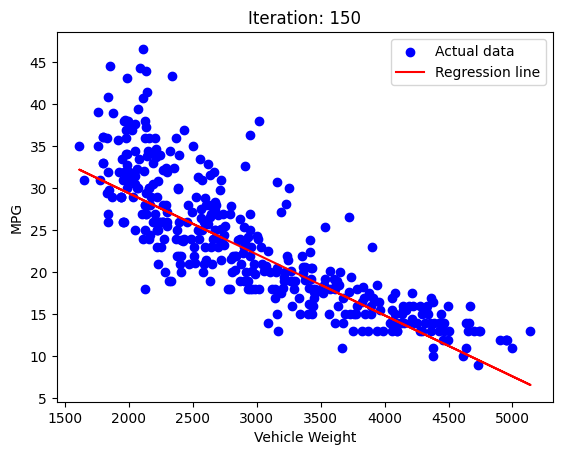

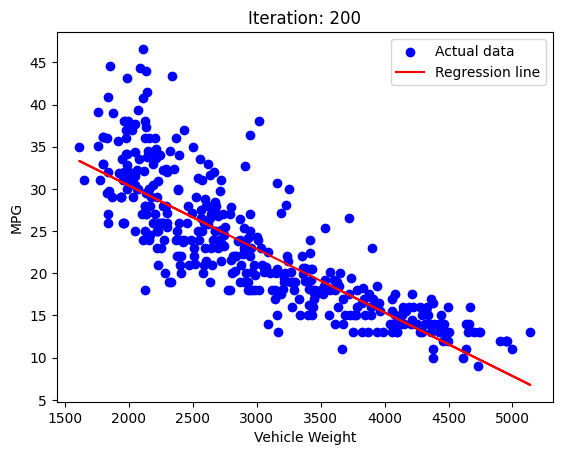

In [48]:
# define gradient descent optimization function (to minimize error)
lr = 0.01
n_iter = 200

# define initial weights and bias terms (same as above)
w = 0.5
b = 0.0

costs=np.empty(shape=[0,]) # deine list of mse each iteration

for i in range(1, n_iter+1):
  # get predictions
  mpg_pred = w * v_weights_norm + b

  # compute gradients with respect to to weight and bias terms (taking partial derivative of loss vs. weight which involves some calculus)
  grad_m = (-2/n) * np.sum(v_weights_norm * (mpg_data - mpg_pred)) # gradient for slope (m)

  # Gradient for y-intercept (b)
  grad_b = (-2/n) * np.sum(mpg_data - mpg_pred)


  # update weights and bias
  w = w - (lr * grad_m)
  b = b - (lr * grad_b)

  # calculate the current loss and append to array of costs(for later)
  cost = mse(mpg_pred, mpg_data, n)
  costs = np.append(costs, cost)


  # visualize line and data points
  if (i == 1 or i % 50 == 0):
    plt.figure() # create a new figure everytime
    plt.scatter(vehicle_weights, mpg_data, color='blue', label='Actual data')
    plt.plot(vehicle_weights, mpg_pred, color='red', label='Regression line')
    plt.title(f"Iteration: {i}")
    plt.xlabel("Vehicle Weight")
    plt.ylabel("MPG")
    plt.legend()

    # print out cost and parameters
    print(f'Iteration: {i}, MSE={cost}, m={w}, b={b}')


print(f'\nLearned Parameters: m={w}, b={b}')

Here's a cool visualization of gradient descent!
https://uclaacm.github.io/gradient-descent-visualiser/

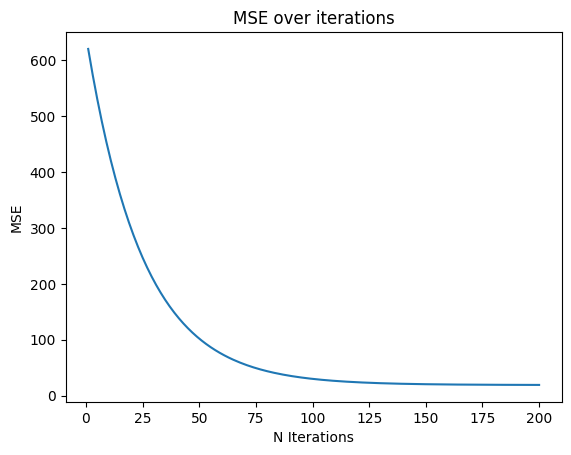

In [49]:
# visualize loss after each iteration to show convergence
plt.plot(np.arange(1, n_iter+1), costs)
plt.title("MSE over iterations")
plt.xlabel('N Iterations')
plt.ylabel('MSE')
plt.show()

We can see the loss function converge to a minimum as the number of iterations increases!

### Implementation with scikit-learn using SGDRegressor() class

In [50]:
# initializing sgd regressor object
reg = SGDRegressor(loss='squared_error', max_iter=1000) # uses stochastic gradient descent

reg.fit(v_weights_norm.to_frame(), mpg_data) # we will fit / train model on our normalized data (needs to be converted from series to dataframe)

predictions = reg.predict(v_weights_norm.to_frame()) # get predictions

In [51]:
err = mse(predictions, mpg_data, n)

print(err)

18.781047181540778


In [52]:
# print out model parameters
b_sk = reg.intercept_
m_sk = reg.coef_

print(f'Learned Parameters: m={m_sk}, b={b_sk}')
print(f'From Scratch Parameters: m={w}, b={b}') # compared to our scratch params, they are very similar!

Learned Parameters: m=[-6.49640331], b=[23.5239275]
From Scratch Parameters: m=-6.376473869724301, b=23.10099981232756


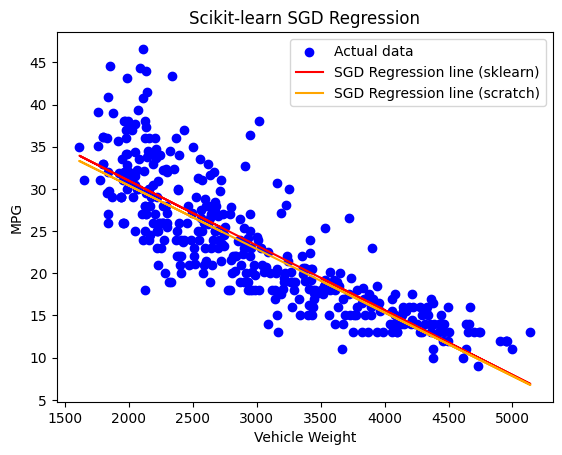

In [53]:
# visualize predictions
plt.scatter(vehicle_weights, mpg_data, color='blue', label='Actual data')
plt.plot(vehicle_weights, predictions, color='red', label='SGD Regression line (sklearn)')
plt.plot(vehicle_weights, mpg_pred, color='orange', label='SGD Regression line (scratch)')

plt.title('Scikit-learn SGD Regression')
plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")

plt.legend()
plt.show()

### Use of Optimized Least Squares (OLS) Linear Regression - sklearn LinearRegression() class

This is the linear regression many of you all would be familiar with, which is more statistics based. It calculates the coefficients / weights through minimizing the squared residuals. Here is an image below:

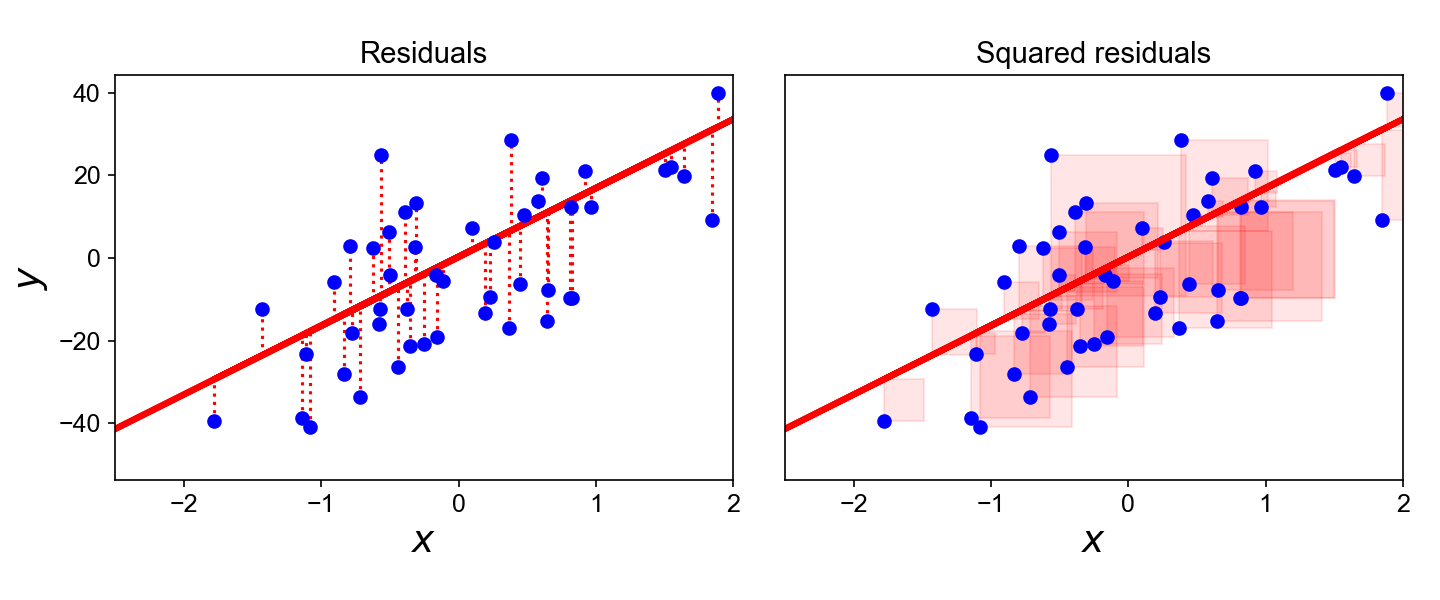

In [54]:
lr = LinearRegression() # initialize model

lr.fit(v_weights_norm.to_frame(), mpg_data) # fit model on our data (X & y)

pred_ols = lr.predict(v_weights_norm.to_frame()) # get predictions for mpg

In [55]:
err = mse(pred_ols, mpg_data, n) # calculate error

print(err)

18.780939734628394


In [56]:
# print out model parameters
b_ols = lr.intercept_
m_ols = lr.coef_

print(f'Learned Parameters: m={m_ols}, b={b_ols}')

Learned Parameters: m=[-6.50087409], b=23.514572864321607


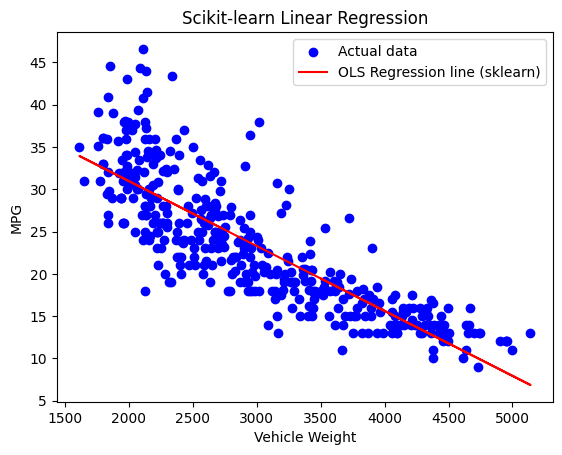

In [57]:
# visualize predictions
plt.scatter(vehicle_weights, mpg_data, color='blue', label='Actual data')
plt.plot(vehicle_weights, pred_ols, color='red', label='OLS Regression line (sklearn)')

plt.title('Scikit-learn Linear Regression')
plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")

plt.legend()
plt.show()

In this case the non-iterative, OLS method worked just as well than the iterative, gradient descent approach for modeling this relationship in this dataset but is a lot less computationally expensive since it works well for small to medium sized datasets. **SGD** would work very well for higher dimensionality and larger datasets.